## Importación librerias

In [74]:

import pandas as pd
import numpy as np


from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [75]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


##  1er. Dataset . Carga de datos. Información

In [76]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [77]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [78]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
40659,11579,92569,1,2,2014-07-15,6,cfd72424-21a8-4534-89a9-9d2048c929a3
3045,3045,31282,1,1,2012-12-16,17,7b17ba45-fd8f-4ce9-a9bf-8b0b36442284
8972,8972,147748,1,1,2012-11-17,3,6da1c2f5-fcc6-4c10-b3d4-62515edc30e2
20213,98,25503,1,2,2013-10-21,28,fce9900c-8e19-47a5-9999-3f30bec56029
24813,4698,171152,1,2,2013-12-11,3,5c43b17a-5dc9-4c9e-ad45-353e307392cf
5216,5216,130705,2,1,2012-12-09,21,87daa1e2-35fe-46d3-a19c-76a7cdcf980d
37810,8730,76400,0,2,2014-09-18,9,a1eefed5-8714-4376-b731-9ae958bd8d0c
32197,3117,96798,1,2,2014-06-30,3,89df01c6-7ccb-4dc5-9ad3-561fbb7c37f0
489,489,25439,1,2,2012-01-07,26,8b62d5f9-f9fe-4590-8ee4-0f683d8a6884
7311,7311,98371,2,1,2012-05-17,24,f73d0ee6-6822-4a56-b06f-6e90079c312d


In [79]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64[ns])

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.

# * Pasos limpieza y transformación

1.	Eliminar Unnamed: 0.

2.	Revisar duplicados en ID.

3.	Distribución de Income: outliers, clientes con ingresos extremos.

4.	Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos, etc.

5.	Antigüedad del cliente: calcular diferencia entre fecha actual y Dt_Customer.

6.	NumWebVisitsMonth: nº visitas.


# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [80]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [81]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR): No se detectan outliers en la variable Income según la regla IQR y percentiles (p01–p99). Se mantiene la variable sin modificaciones.
4. Umbrales percentil
5. Boxplot de Income

In [82]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [83]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [84]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [85]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




Realizo un boxplot income como verificación visual de la distribución y confirmación de que no existen outliers

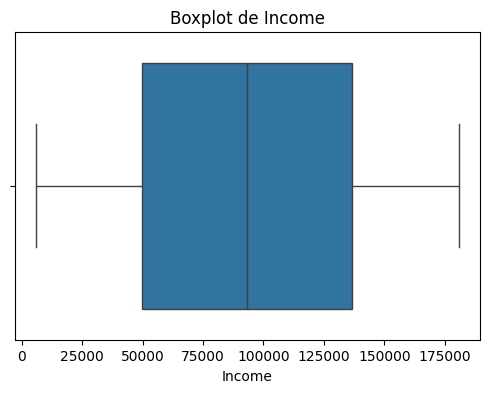

In [86]:
#5. Boxplot de income
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





# 4. Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos.
1. Importo Numpy
2. Conviero las columnas en nº enteros, errores en NaN.
3. Distribución y nulos
4. Total de hijos. Creo variable deribada.


In [87]:
# 2. Convierto en nº enteros, errores.

for c in ['Kidhome','Teenhome']:
    df_customer[c] = pd.to_numeric(df_customer[c], errors='coerce').astype('Int64')


In [88]:
# 3. Distribución básica y nulos

for c in ['Kidhome','Teenhome']:
    print(f"{c}  - nulos:", df_customer[c].isna().sum())
    print(df_customer[c].value_counts(dropna=False).sort_index(), "\n")

Kidhome  - nulos: 0
Kidhome
0    14270
1    14425
2    14475
Name: count, dtype: Int64 

Teenhome  - nulos: 0
Teenhome
0    14402
1    14425
2    14343
Name: count, dtype: Int64 



In [89]:
# 4. Total de hijos
df_customer['Children_total'] = (df_customer['Kidhome'] . fillna(0) +
                                                    df_customer['Teenhome'] . fillna(0)). astype ('int64')


Confirmo la creación de la columna =total children

In [90]:
df_customer. sample(20)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total
34078,68285,1,1,2014-05-28,3,89026ff8-ac6c-49e4-9800-7433fde9b9a5,False,2
32260,135576,0,0,2014-12-09,23,eba00fda-2ef2-4aea-ae3a-111f52874bda,False,0
829,149713,2,1,2012-08-28,23,dcaa05d9-8fdf-4178-803b-d79ee8c74012,False,3
26600,32872,1,1,2013-08-10,21,be6beac1-339e-4a43-b968-9dcfdb74219d,False,2
10826,142077,0,0,2012-02-22,30,1a9ec9f2-5a79-42bc-9993-19b4462faa55,False,0
12980,52910,0,1,2012-01-11,9,bd1d7ab5-4658-4260-8670-77b84a371cd9,False,1
707,104534,1,2,2012-12-09,28,ec861b8a-a8a3-458b-9bae-bf83b265f412,False,3
3836,122546,0,2,2012-12-21,32,c523b502-6a7c-487d-9c41-d192a54fe198,False,2
1888,103746,1,0,2012-11-10,28,8aa482a7-e492-49d8-8064-8de90e27ec51,False,1
483,73085,0,1,2012-09-23,2,89022a8c-67ed-4156-b49c-495b517644a7,False,1


Realizo un boxplot de la variable Children_total como verificación visual de la distribución y confirmación de que no existen outliers.

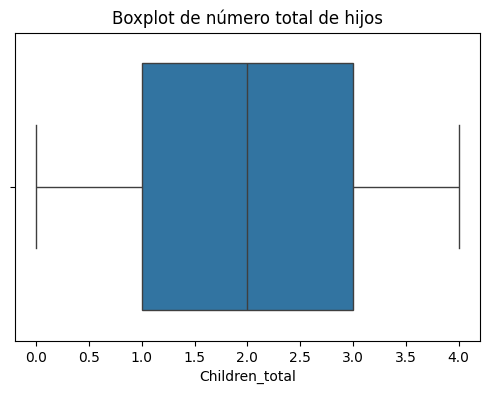

In [91]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Children_total'])
plt.title("Boxplot de número total de hijos")
plt.show()

# 5. Antiguedad del cliente. Creo columna.
1. Aseguro que la columna es tipo fecha
2. Fecha de referencia hoy
3. Creo columna con años antiguedad
4. Compruebo resultado

In [92]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"], errors="coerce")   
ref_date = pd.Timestamp.today().normalize()
df_customer["Customer_Tenure_Years"] = ((ref_date - df_customer["Dt_Customer"]).dt.days // 365).astype("Int64")
df_customer[["Dt_Customer", "Customer_Tenure_Years"]].head()



,Dt_Customer,Customer_Tenure_Years
0,2012-04-04,13
1,2012-12-30,12
2,2012-02-02,13
3,2012-12-21,12
4,2012-06-20,13


In [93]:
df_customer. sample(20)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
41545,12654,2,2,2014-01-14,7,5f1bb70f-fb09-49ef-9359-e862d671fe3b,False,4,11
2312,51463,2,1,2012-06-11,29,cb4e4fa3-516a-427b-ba0a-6f52a9adeaf1,False,3,13
5044,76426,0,2,2012-01-17,18,0aa7d582-8dc6-42ad-97df-5744d333a6fe,False,2,13
17328,53010,0,1,2012-09-26,10,99124efb-02ea-47ec-ad0c-2a3921294276,False,1,12
16836,30914,1,2,2012-07-10,6,0a90d36a-9c58-435e-8a6c-0ed6b5c702b5,False,3,13
13577,124752,2,1,2012-03-06,11,46522401-63d6-43a7-83e8-39a44b1bdbc1,False,3,13
1331,22066,2,1,2012-09-17,30,e8e1fe5d-9a45-4e48-9fe5-fec33a8b6475,False,3,12
34894,152464,1,2,2014-11-29,29,ca46310c-1200-43a2-a76d-bd78f77304b4,False,3,10
38545,114064,2,1,2014-11-22,9,5961c6f0-973d-4dde-b950-f82a9fa9ab27,False,3,10
27223,81842,0,2,2013-09-05,5,28f6e391-4a22-4f55-ba16-967fec168a2d,False,2,12


# 6. Nº Visitas. Visualizo

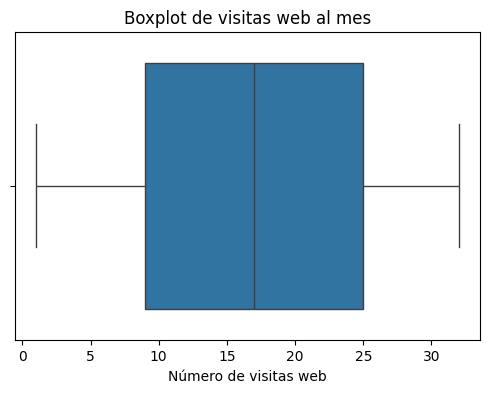

In [94]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer["NumWebVisitsMonth"])
plt.title("Boxplot de visitas web al mes")
plt.xlabel("Número de visitas web")
plt.show()

# 2º Dataset. Carga de datos. información

In [95]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [96]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
25309,25431,43.0,self-employed,MARRIED,basic.4y,0.0,0.0,1.0,cellular,206,...,-0.1,"93,2",-42,NaN,"5195,8",no,1-junio-2015,33.516,-71.874,7ffbcac4-0dd7-47cb-b56b-bc86fa7a8f06
39304,39471,82.0,retired,DIVORCED,basic.4y,0.0,0.0,0.0,cellular,529,...,-1.8,"93,749","-34,6","0,643","5008,7",yes,27-mayo-2017,45.759,-109.301,394ba90e-24b9-4ad7-893e-abcda9fc0bbb
966,1063,42.0,self-employed,MARRIED,university.degree,0.0,1.0,0.0,telephone,234,...,1.1,"93,994","-36,4","4,856",5191,no,20-noviembre-2017,33.752,-88.903,e1000c69-c69f-4256-9e79-435d935c346e
34081,34225,29.0,admin.,MARRIED,university.degree,0.0,1.0,0.0,cellular,126,...,-1.8,"92,893","-46,2","1,281","5099,1",no,3-marzo-2015,28.245,-70.549,0149b12d-d394-4b1f-a45a-624eba272a86
31731,31875,55.0,technician,MARRIED,university.degree,0.0,1.0,1.0,cellular,895,...,-1.8,"92,893","-46,2","1,327","5099,1",yes,5-junio-2018,38.918,-73.467,e32d4c29-c529-4748-a522-39a9798307b8
10754,10851,54.0,housemaid,MARRIED,basic.4y,NaN,0.0,0.0,telephone,221,...,1.4,"94,465","-41,8",NaN,"5228,1",no,29-enero-2016,33.577,-87.600,7fb4cbe5-80d3-4e17-a3b5-71fee51159a1
8464,8561,25.0,blue-collar,MARRIED,high.school,0.0,0.0,1.0,telephone,29,...,1.4,"94,465","-41,8","4,864","5228,1",no,21-julio-2017,40.833,-118.486,5b4d5ca1-1f70-4fe1-8f70-aeb6afd3c8bc
30231,30375,34.0,technician,MARRIED,university.degree,0.0,0.0,0.0,cellular,82,...,-1.8,"93,075","-47,1","1,365","5099,1",no,3-julio-2016,30.382,-94.406,952b3847-b330-4f1a-823c-60ac8e818eb1
1868,1965,52.0,blue-collar,SINGLE,basic.9y,NaN,1.0,0.0,telephone,160,...,1.1,"93,994","-36,4","4,855",5191,no,9-octubre-2015,48.101,-86.665,1f8234e6-bf11-41b0-9ab1-31cf3812f6ec
28560,28704,35.0,admin.,SINGLE,high.school,0.0,1.0,0.0,cellular,352,...,-1.8,"93,075","-47,1","1,41","5099,1",no,8-septiembre-2018,34.648,-120.999,6b9ea9d1-34d2-4425-a95b-eb0199b5f0b7


In [97]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

## Visualizo toda la información, nulos y tipo de dato

In [98]:
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
Unnamed: 0               43000           0    int64
age                      37880        5120  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed 

# Columnas e información ( Hay datos incompletos)

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos.

10. campaign (int64):  número de veces que se ha contactado al cliente.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó).

12. previous (int64): número de contactos anteriores.

13. poutcome (object): resultado de campaña de marketing anterior.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor.

16. cons.conf.idx (object): indice de confianza del consumidor.

17. euribor3m (object): tasa de interés euríbor a 3 meses.

18. nr.employed (object): número de empleados (indicador económico).

19. month (object): mes del último contacto de la campaña.

20. day_of_week (object): día de la semana del último contacto.

21. longitude (float64): localización geográfica.

22. id (object): identificador único del cliente.

23. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).


# * Pasos limpieza y transformación (cuando este detallarlo bien)



Eliminar Unnamed: 0.

Revisar valores faltantes (default, housing, loan, marital, job).

Analizar la variable objetivo y (cuántos clientes aceptaron vs rechazaron)

Distribución de edad: ver segmentos más contactados.

Cruzar duración de llamadas (duration) con éxito (y).

Revisar variables económicas (euribor3m, emp.var.rate): ómo influyen en la respuesta.

Outliers en duración de llamadas y pdays.






# 1. Eliminamos columna Unnamed

In [99]:
df_bank = df_bank.drop(columns=["Unnamed: 0"])

# Comprobar columnas resultantes
print(df_bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')


# 2. Columna age, tenemos 12% aprox. de nulos. 
1. Visualizo: edades entre 30 y 50 años, mediana aprox. 40 años (38), de 18 a 20 años los más jóvenes, mayores apox 70 años. Hay clientes con edades entre los 70 y 100 años. 
2. Reemplazo nulos por la mediana

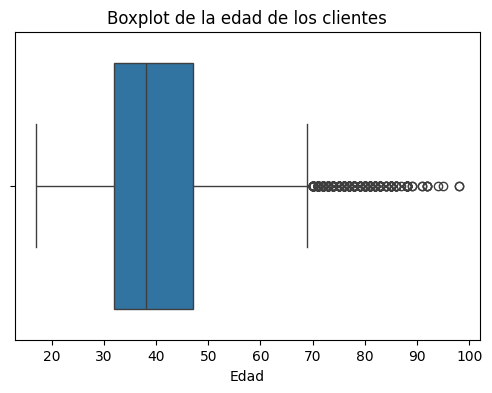

In [100]:
# Visualizo
plt.figure(figsize=(6,4))
sns.boxplot(x=df_bank["age"].dropna())
plt.title("Boxplot de la edad de los clientes")
plt.xlabel("Edad")
plt.show()

In [101]:
# Reemplazo nulos por mediana 38 años
# Calcular la mediana de la edad (ignorando nulos)
mediana_age = df_bank["age"].median()

# Rellenar los nulos con la mediana
df_bank["age"] = df_bank["age"].fillna(mediana_age)

# Compruebo que ya no hay nulos en la columna age
print("Nulos en edad después de imputar:", df_bank["age"].isna().sum())
print("Mediana usada:", mediana_age)


Nulos en edad después de imputar: 0
Mediana usada: 38.0


In [102]:
# visulizo la información de nuevo
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
age                      43000           0  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed              43000           0   object
y           

# 3. Columna job. Reemplazo nulos por "desconocido"

In [103]:
df_bank['job'] = df_bank['job'].fillna('desconocido')

#visualizo categorías únicas

print(df_bank['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'desconocido' 'entrepreneur'
 'student']


# 4. Columna Marital. Reemplazo nulos por "desconocido". Convierto todo en minúsculas y quito espacios

In [104]:
df_bank['marital'] = df_bank['marital'].fillna('desconocido').replace('', 'desconocido')

#visualizo categorías únicas

print(df_bank['marital'].unique())

# Covertimos en minúsculas y quitamos espacios al principio

df_bank['marital'] = df_bank['marital'].str.strip().str.lower()

# vuelvo a visualizar
print(df_bank['marital'].unique())



['MARRIED' 'SINGLE' 'DIVORCED' 'desconocido']
['married' 'single' 'divorced' 'desconocido']


# 5. Columna Education. Cambio nulos por "desconocido". Convertimos en minúsculas y quito espacios. Agrupo categorías

In [105]:
df_bank['education'] = df_bank['education'].str.strip().str.lower()

#cambio nulos por desconocido
df_bank['education'] = df_bank['education'].replace('', 'desconocido').fillna('desconocido')



#agrupo categorías

df_bank['education'] = df_bank['education'].replace({
    'basic.4y': 'basico',
    'basic.6y': 'basico',
    'basic.9y': 'basico',
    'high.school': 'secundaria',
    'university.degree': 'universidad',
    'professional.course': 'profesional',
    'illiterate': 'sin_estudios',
    'desconocido': 'desconocido'
})
#visualizo. Confirmo todo lo hecho anteriormente

print(df_bank['education'].unique())
df_bank.info()


['basico' 'secundaria' 'profesional' 'desconocido' 'universidad'
 'sin_estudios']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 